<a href="https://colab.research.google.com/github/Schiweppes/ISIC-2018-Segmentation-Task/blob/main/ISIC_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ISIC Segmentation Task

## Load The Data via Kaggle


In [ ]:
! pip install kaggle

In [ ]:
# create folder named .kaggle (kaggle api dictates that way)
! mkdir ~/.kaggle

In [ ]:
# copy kaggle.json from my google drive path into "".kaggle" directory
! cp '/content/drive/MyDrive/Colab Notebooks/kaggle.json' ~/.kaggle/

In [ ]:
# authorize kaggle
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# import dataset to your local
! kaggle datasets download tschandl/isic2018-challenge-task1-data-segmentation

100% 12.9G/12.9G [04:22<00:00, 74.0MB/s]
100% 12.9G/12.9G [04:22<00:00, 52.6MB/s]


In [ ]:
# unzip the file (cleared output)
!unzip isic2018-challenge-task1-data-segmentation.zip

## Prepare The Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import os
import glob
import cv2

In [ ]:
training_path = '/content/ISIC2018_Task1-2_Training_Input'
training_truth_path = '/content/ISIC2018_Task1_Training_GroundTruth'
validation_path = '/content/ISIC2018_Task1-2_Validation_Input'
test_path = '/content/ISIC2018_Task1-2_Test_Input'

Kaggle doesn't have the validation mask. So I downloaded it from elsewhere.

In [ ]:
train = glob.glob(training_path+'/*.jpg')
train_truth = glob.glob(training_truth_path+'/*.png')

validation = glob.glob(validation_path+'/*.jpg')
# acces validation mask via google drive
validation_truth = glob.glob('/content/drive/MyDrive/Colab Notebooks/ISIC2018_Task1_Validation_GroundTruth/*.png')
test = glob.glob(test_path+'/*.jpg')

"""
2594 train
100 valid
1000 test
"""

'\n2594 train\n100 valid\n1000 test\n'

Training-Mask and Validation-Mask doesn't match. We need to sort it.

/content/ISIC2018_Task1_Training_GroundTruth/ISIC_0014720_segmentation.png


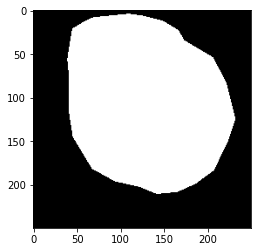

In [ ]:
img = cv2.imread(train_truth[1])
img = cv2.resize(img,(250,250))
print(train_truth[1])
plt.imshow(img)

/content/ISIC2018_Task1-2_Training_Input/ISIC_0013271.jpg


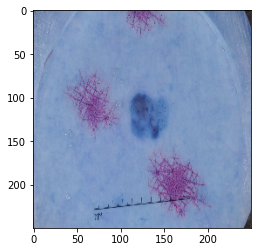

In [ ]:
img = cv2.imread(train[1])
img = cv2.resize(img,(250,250))
print(train[1])
plt.imshow(img)

I sort the data by the index values in the filepaths

In [ ]:
train_sorted = sorted(train,key = lambda x:int(x[-11:-4])) #index range of ids
train_truth_sorted = sorted(train_truth,key=lambda x: int(x[-24:-17])) #index range of ids

In [ ]:
valid_sorted = sorted(validation,key = lambda x:int(x[-11:-4]))
valid_truth_sorted = sorted(validation_truth,key=lambda x: int(x[-24:-17]))

/content/ISIC2018_Task1_Training_GroundTruth/ISIC_0000088_segmentation.png


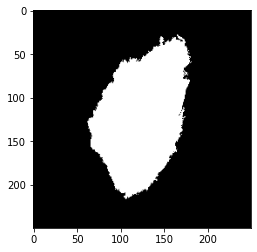

In [ ]:
img = cv2.imread(train_truth_sorted[80])
img = cv2.resize(img,(250,250))
print(train_truth_sorted[80])
plt.imshow(img)

/content/ISIC2018_Task1-2_Training_Input/ISIC_0000088.jpg


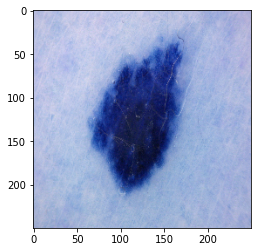

In [ ]:
img = cv2.imread(train_sorted[80])
img = cv2.resize(img,(250,250))
print(train_sorted[80])
plt.imshow(img)

In [ ]:
for i,j in zip(train_sorted,train_truth_sorted):
    if i[-11:-4] != j[-24:-17]:
        print('Mismatch!')

In [ ]:
for i,j in zip(valid_sorted,valid_truth_sorted):
    if i[-11:-4] != j[-24:-17]:
        print('Mismatch!')


Quick display of first 8 train image and its mask

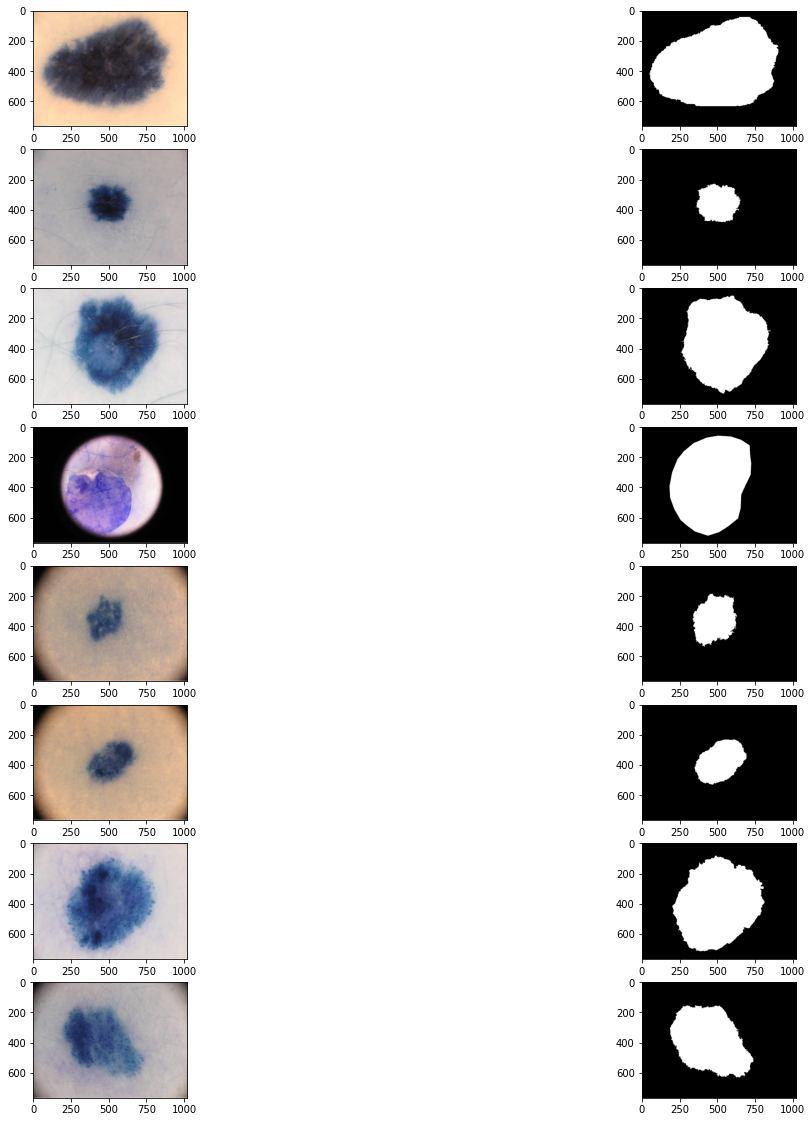

In [ ]:
def grid_validation(rows,cols,x,x_truth):
    f, axarr = plt.subplots(rows,cols)
    f.set_figheight(20)
    f.set_figwidth(20)
    for i in range(rows):
        for j in range(cols):
            if j%2:
                axarr[i,j].imshow(cv2.imread(x_truth[i]))
            else:
                axarr[i,j].imshow(cv2.imread(x[i]))

# Grid of images of train and train mask
grid_validation(8,2,train_sorted,train_truth_sorted)

Quick display of first 8 validation image and its mask

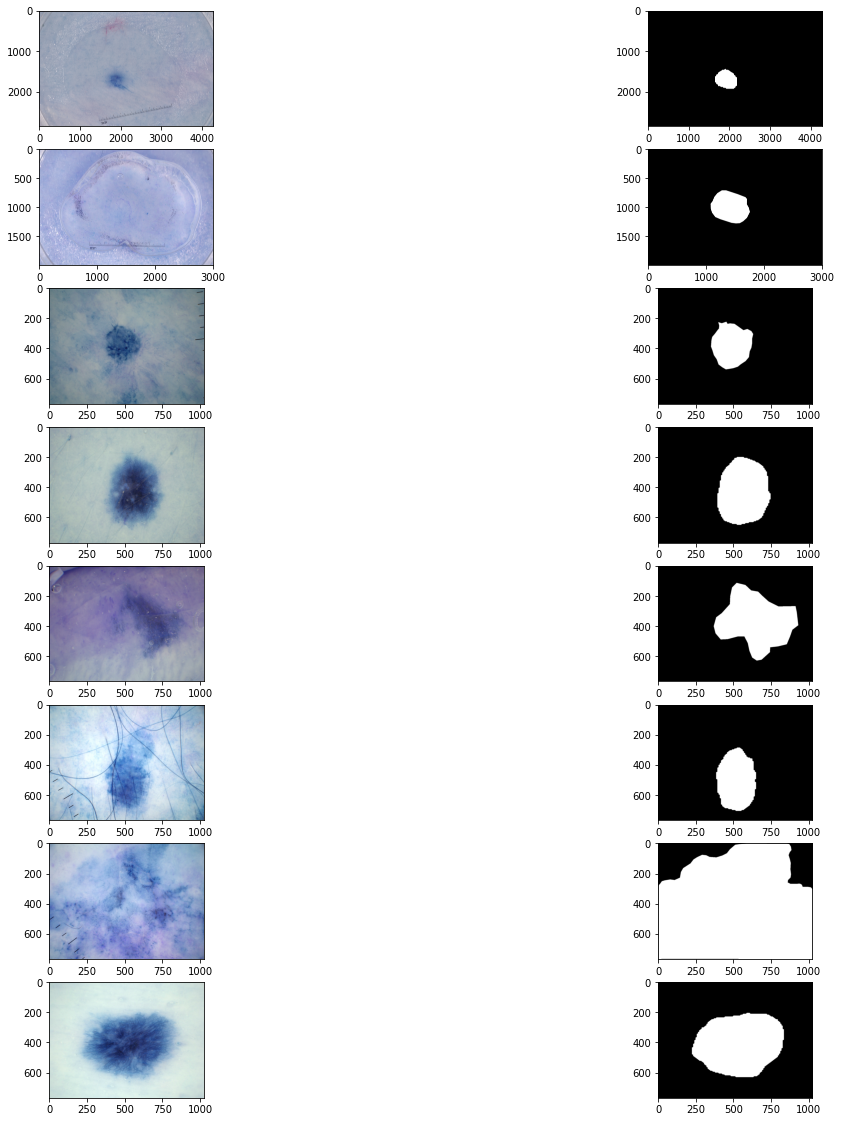

In [ ]:
# Grid of images of validation and validation mask
grid_validation(8,2,valid_sorted,valid_truth_sorted)

## Preprocess The Data

I decided to create DataFrame object containing filepaths of the images.
And create dataset with the help of "flow_from_dataframe" method.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
BATCH_SIZE = 16
SEED = 727
IMG_SIZE = 128

In [ ]:
train_df = pd.DataFrame(train_sorted,columns = ['filename'])
train_truth_df = pd.DataFrame(train_truth_sorted,columns = ['filename'])
val_df = pd.DataFrame(valid_sorted,columns = ['filename'])
val_truth_df = pd.DataFrame(valid_truth_sorted,columns = ['filename'])
test_df = pd.DataFrame(test,columns = ['filename'])

In [ ]:
datagen = ImageDataGenerator(rescale=1./255) # no data augmentation applied

In [ ]:
# We have to set class_mode to "None"
train_data = datagen.flow_from_dataframe(dataframe = train_df,
                                         class_mode=None,
                                         batch_size = BATCH_SIZE,
                                         seed = SEED,
                                         target_size = (IMG_SIZE,IMG_SIZE))

train_mask_data = datagen.flow_from_dataframe(dataframe = train_truth_df,
                                         class_mode=None,
                                         batch_size = BATCH_SIZE,
                                         seed = SEED,
                                         target_size = (IMG_SIZE,IMG_SIZE))

valid_data = datagen.flow_from_dataframe(dataframe = val_df,
                                         class_mode=None,
                                         batch_size = BATCH_SIZE,
                                         seed = SEED,
                                         target_size = (IMG_SIZE,IMG_SIZE))

valid_mask_data = datagen.flow_from_dataframe(dataframe = val_truth_df,
                                         class_mode=None,
                                         batch_size = BATCH_SIZE,
                                         seed = SEED,
                                         target_size = (IMG_SIZE,IMG_SIZE))

test_data = datagen.flow_from_dataframe(dataframe = test_df,
                                         class_mode=None,
                                         batch_size = BATCH_SIZE,
                                         seed = SEED,
                                         target_size = (IMG_SIZE,IMG_SIZE))

Found 2594 validated image filenames.
Found 2594 validated image filenames.
Found 100 validated image filenames.
Found 100 validated image filenames.
Found 1000 validated image filenames.


We create labels by zipping train/validation image flow and its mask

In [ ]:
train_generator = zip(train_data,train_mask_data)

In [ ]:
validation_generator = zip(valid_data,valid_mask_data)

## Creating Model

I implemented UNet architecture for this segmentation task. (I reduced filter size of bottleneck layer from 1024 to 512. This drastically shorten the ETA per epoch.)

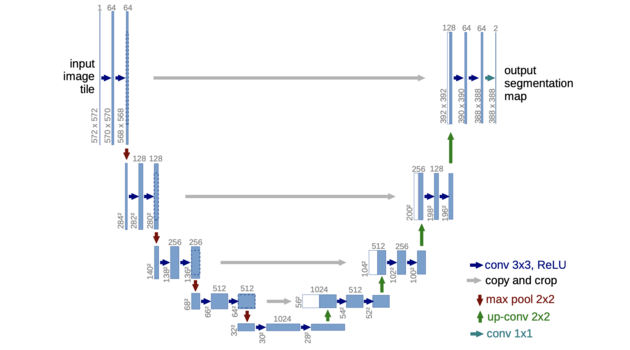

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# convolution block to use in samplings
def conv_block(x,n_filters):
    
    x = layers.Conv2D(filters = n_filters,
                      kernel_size = (3,3),
                      padding = 'same',
                      activation = 'relu',
                      kernel_initializer = 'he_normal')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv2D(filters = n_filters,
                      kernel_size = (3,3),
                      padding = 'same',
                      activation = 'relu',
                      kernel_initializer = 'he_normal')(x)
    x = layers.BatchNormalization()(x)
    return x

In [ ]:
# downsample block
def downsample_block(x,n_filters):

    f = conv_block(x,n_filters)
    p = layers.MaxPooling2D()(f)
    p = layers.Dropout(0.3)(p)

    return f,p


In [ ]:
# upsample blocks
def upsample_block(x,conv_features,n_filters):
    
    x = layers.Conv2DTranspose(filters = n_filters,
                               kernel_size = (3,3),
                               strides = (2,2),
                               padding = 'same')(x)
    x = layers.BatchNormalization()(x)
    

    x = layers.concatenate([x,conv_features])
    x = layers.Dropout(0.3)(x)
    x = conv_block(x,n_filters)

    return x

In [ ]:
def UNet():
    input = layers.Input(shape = (IMG_SIZE,IMG_SIZE,3))

    # downsample block-1
    f1,p1 = downsample_block(input,64)
    # downsample block-2
    f2,p2 = downsample_block(p1,128)
    # downsample block-3
    f3,p3 = downsample_block(p2,256)

    # bottleneck
    bottleneck = conv_block(p3,512)

    # upsample block-1
    u1 = upsample_block(bottleneck, f3, 256)
    # upsample block-2
    u2 = upsample_block(u1, f2, 128)
    # upsample block-3
    u3 = upsample_block(u2, f1, 64)
    

    output = layers.Conv2D(filters= 3,
                           kernel_size = (1,1),
                           padding = 'same',
                           activation = 'sigmoid')(u3)

    return keras.Model(input,output)
    
     



In [ ]:
uNet_model = UNet()

uNet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 128, 128, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
# used MeanIoU for segmentation metric as well as accuracy
uNet_model.compile(optimizer = keras.optimizers.Adam(learning_rate = 1e-3),
                   loss = 'categorical_crossentropy',
                   metrics = [keras.metrics.Accuracy(),keras.metrics.MeanIoU(3)])

I also implemented some of the keras callbacks that I consider really helpful.

In [ ]:
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                              factor=0.2,
                                              patience=2,
                                              min_lr=1e-5)

In [ ]:
# save the best model to google drive
checkpoint = keras.callbacks.ModelCheckpoint(
    filepath ='/content/drive/MyDrive/Colab Notebooks/Segmentation/UNet',
    monitor='val_loss',
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
    save_freq='epoch',
    options=None,
    initial_value_threshold=None,
)

In [ ]:
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=3,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

callbacks = [reduce_lr,checkpoint,early_stop]

In [ ]:
history = uNet_model.fit(train_generator,
                         batch_size = BATCH_SIZE,
                         epochs= 20,
                         callbacks = callbacks,
                         workers = -1,
                         validation_data = validation_generator,
                         validation_steps = (len(val_df)//BATCH_SIZE),
                         steps_per_epoch=(len(train_df)//BATCH_SIZE))

Epoch 1/20
162/162 [==============================] - 765s 5s/step - loss: 0.7267 - accuracy: 0.0963 - mean_io_u: 0.6340 - val_loss: 3.9940 - val_accuracy: 0.2570 - val_mean_io_u: 0.4180 - lr: 0.0010
Epoch 2/20
162/162 [==============================] - 738s 5s/step - loss: 0.7159 - accuracy: 0.1565 - mean_io_u: 0.7691 - val_loss: 1.1662 - val_accuracy: 0.2350 - val_mean_io_u: 0.6152 - lr: 0.0010
Epoch 3/20
162/162 [==============================] - 728s 5s/step - loss: 0.7147 - accuracy: 0.1665 - mean_io_u: 0.7899 - val_loss: 0.9235 - val_accuracy: 0.3625 - val_mean_io_u: 0.6856 - lr: 0.0010
Epoch 4/20
162/162 [==============================] - 718s 4s/step - loss: 0.7167 - accuracy: 0.5447 - mean_io_u: 0.8092 - val_loss: 1.5102 - val_accuracy: 0.7497 - val_mean_io_u: 0.7197 - lr: 0.0010
Epoch 5/20
162/162 [==============================] - 721s 4s/step - loss: 0.7167 - accuracy: 0.8683 - mean_io_u: 0.8185 - val_loss: 0.9330 - val_accuracy: 0.7820 - val_mean_io_u: 0.7110 - lr: 0.0010


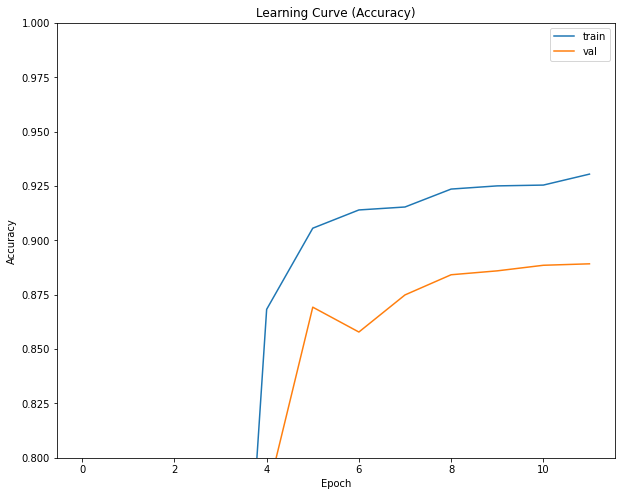

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(x = history.epoch, y = history.history['accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

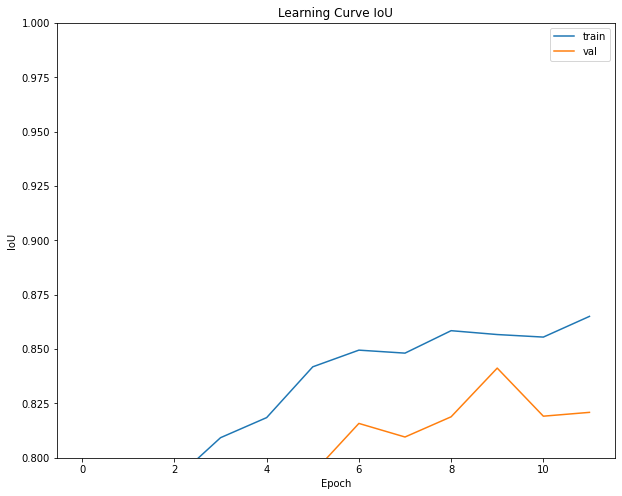

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(x = history.epoch, y = history.history['mean_io_u'])
sns.lineplot(x = history.epoch, y = history.history['val_mean_io_u'])
ax.set_title('Learning Curve IoU')
ax.set_ylabel('IoU')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

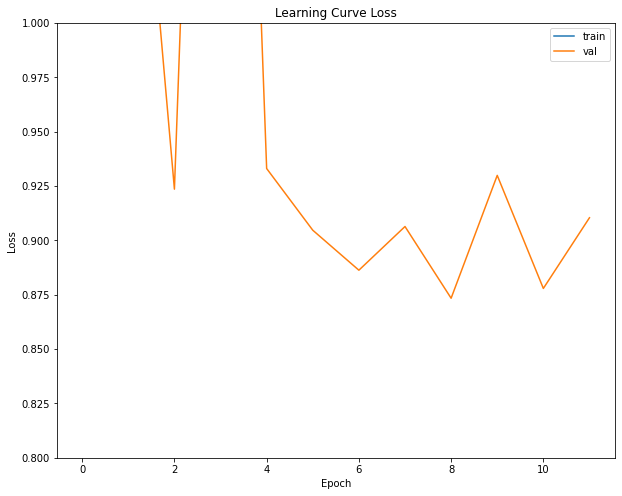

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve Loss')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

As we can see our model started to improve after the second epoch. 

Validation loss kept decreasing relative to the training loss.

IoU and Accuracy metrics kept increasing after the second epoch.



---


In order to display the prediction masks, I unshuffled the data.

In [ ]:
valid_data_unshuffle = datagen.flow_from_dataframe(dataframe = val_df,
                                         class_mode=None,
                                         batch_size = BATCH_SIZE,
                                         seed = SEED,
                                         shuffle= False,
                                         target_size = (IMG_SIZE,IMG_SIZE))

valid_mask_data_unshuffle = datagen.flow_from_dataframe(dataframe = val_truth_df,
                                         class_mode=None,
                                         batch_size = BATCH_SIZE,
                                         seed = SEED,
                                         shuffle= False,
                                         target_size = (IMG_SIZE,IMG_SIZE))

test_data_unshuffle = datagen.flow_from_dataframe(dataframe = test_df,
                                         class_mode=None,
                                         batch_size = BATCH_SIZE,
                                         seed = SEED,
                                         shuffle= False,
                                         target_size = (IMG_SIZE,IMG_SIZE))

Found 100 validated image filenames.
Found 100 validated image filenames.
Found 1000 validated image filenames.


In [ ]:
val_preds = uNet_model.predict(valid_data_unshuffle,verbose = 1)

7/7 [==============================] - 12s 1s/step


In [ ]:
test_preds = uNet_model.predict(test_data_unshuffle,verbose = 1)

63/63 [==============================] - 125s 2s/step


Simple functions to display 10 sample images and its masks at given starting index.

In [ ]:
def grid_mask_validation(start_idx,row):
    f, axarr = plt.subplots(row,3)
    f.set_figheight(20)
    f.set_figwidth(20)
    for i in range(row):
        for j in range(3):
            if j == 0:
                axarr[i,j].imshow(cv2.imread(valid_sorted[start_idx+i]))
                axarr[i,j].set_title('Image')

            elif j == 1:
                axarr[i,j].imshow(cv2.imread(valid_truth_sorted[start_idx+i]))
                axarr[i,j].set_title('Ground Truth')
            
            else:
               axarr[i,j].imshow(val_preds[start_idx+i])
               axarr[i,j].set_title('Predicted Mask')


In [ ]:
def grid_mask_test(start_idx,row):
    f, axarr = plt.subplots(row,2)
    f.set_figheight(30)
    f.set_figwidth(30)
    for i in range(row):
        for j in range(2):
            if j == 0:
                axarr[i,j].imshow(cv2.imread(test[start_idx+i]))
                axarr[i,j].set_title('Image')
            
            else:
               axarr[i,j].imshow(test_preds[start_idx+i])
               axarr[i,j].set_title('Predicted Mask')

## Results

Validation results of beginning/middle/end of data validation dataset.

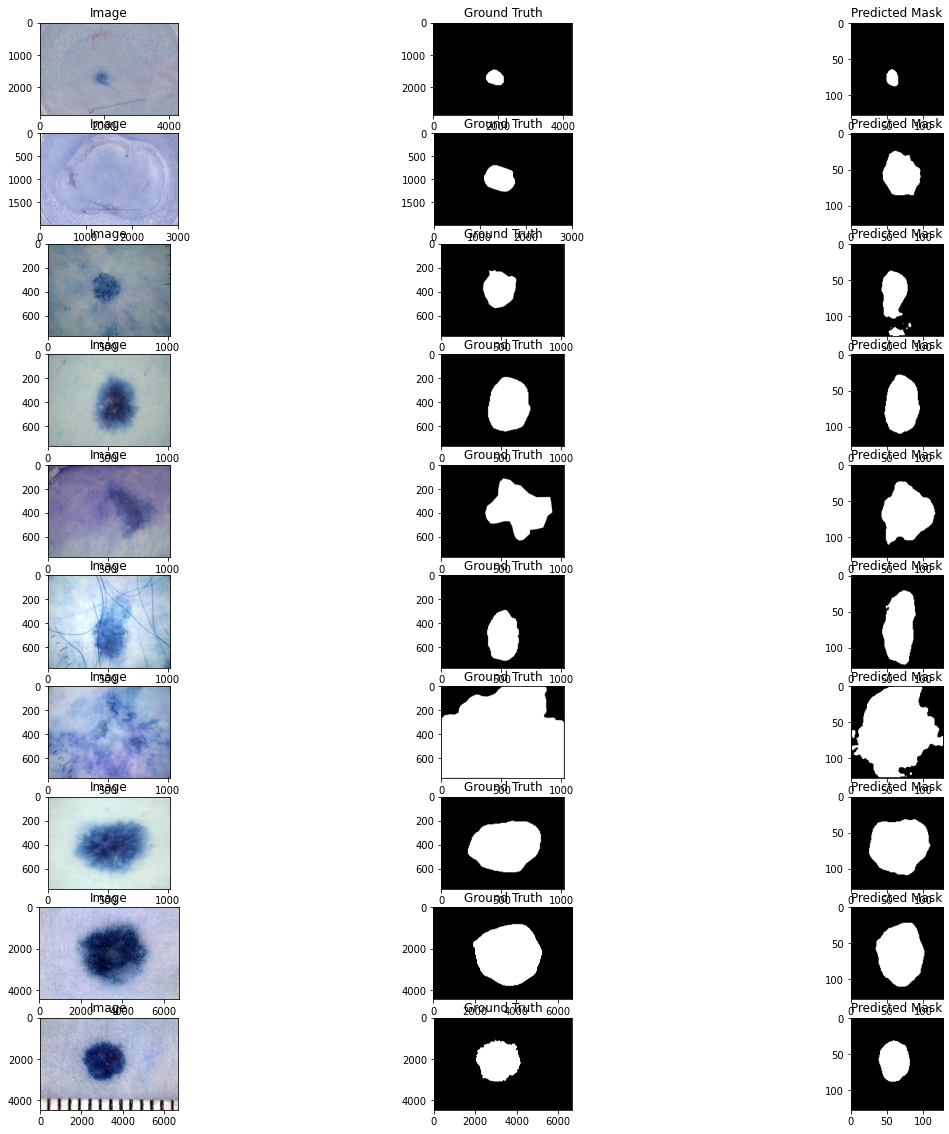

In [ ]:
grid_mask_validation(0,10)

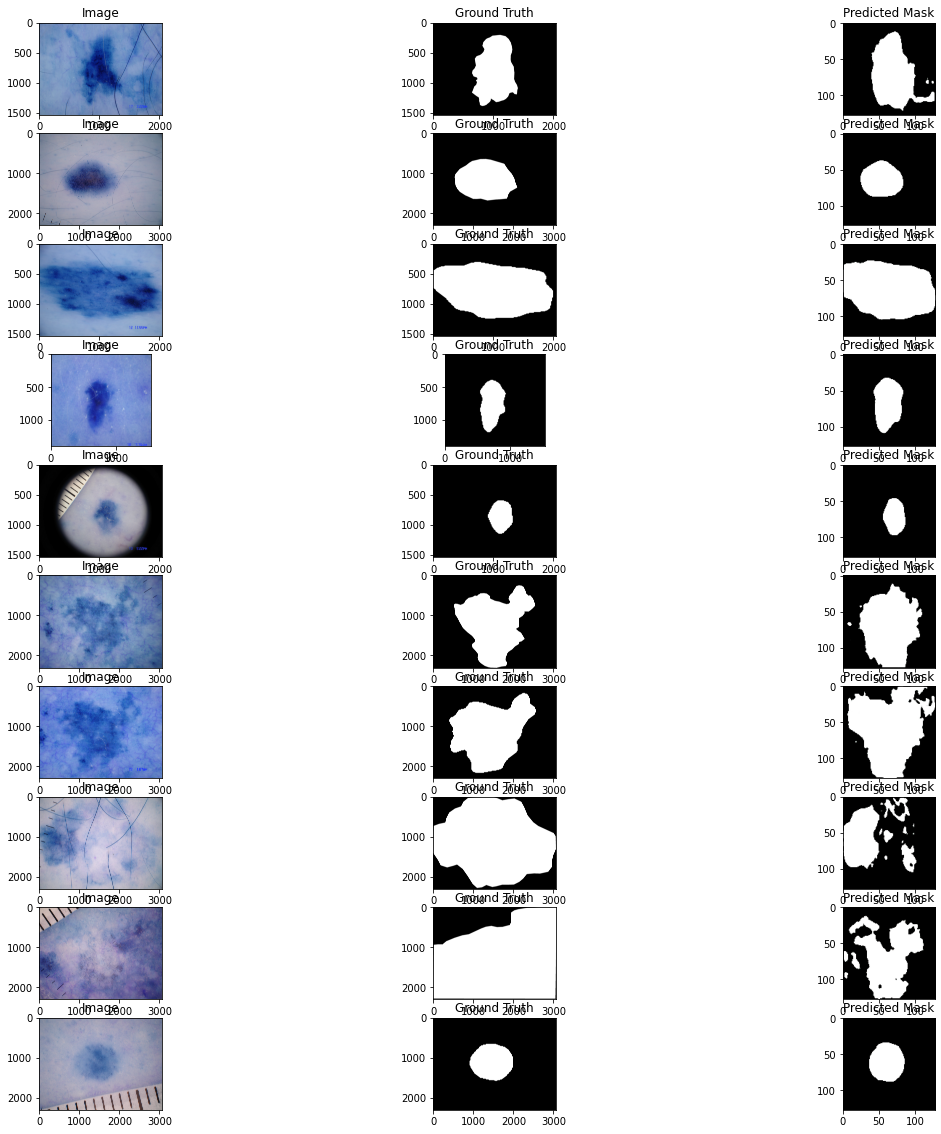

In [ ]:
grid_mask_validation(50,10)

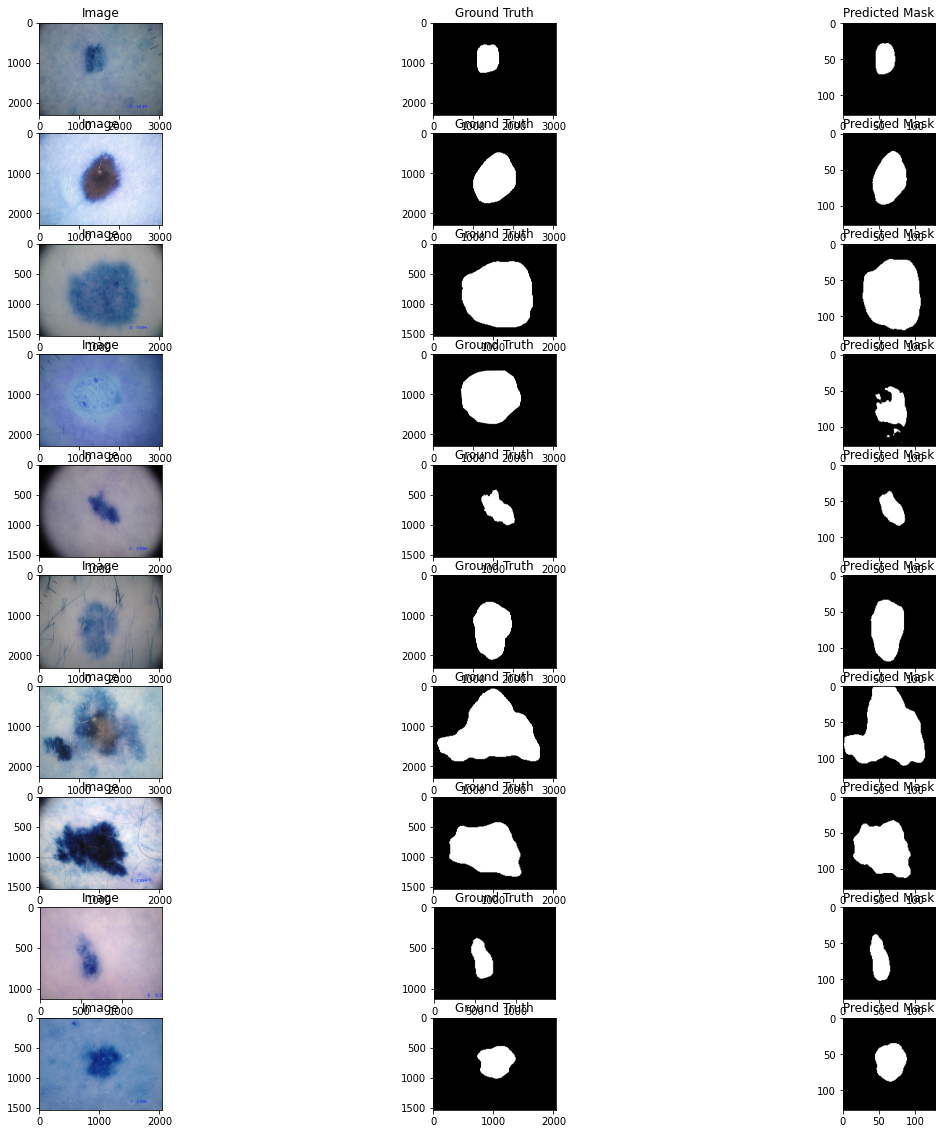

In [ ]:
grid_mask_validation(90,10)



---


Test results of beginning/middle/end of data test dataset.

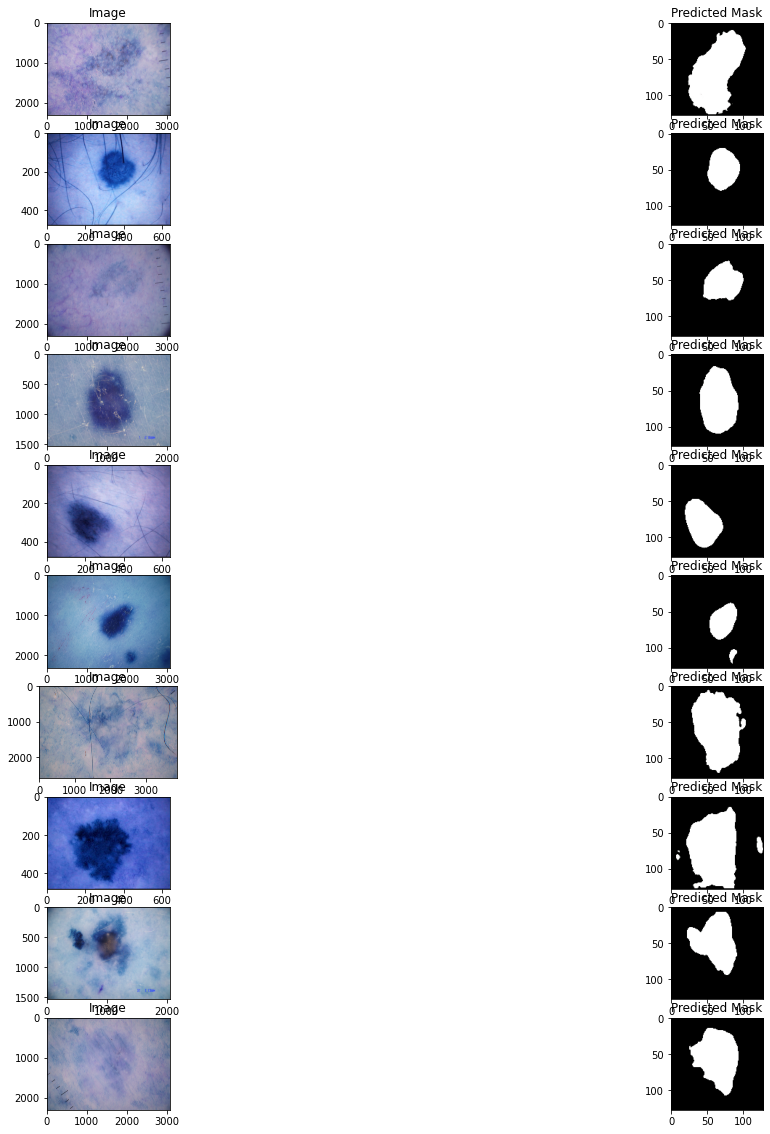

In [ ]:
grid_mask_test(0,10)

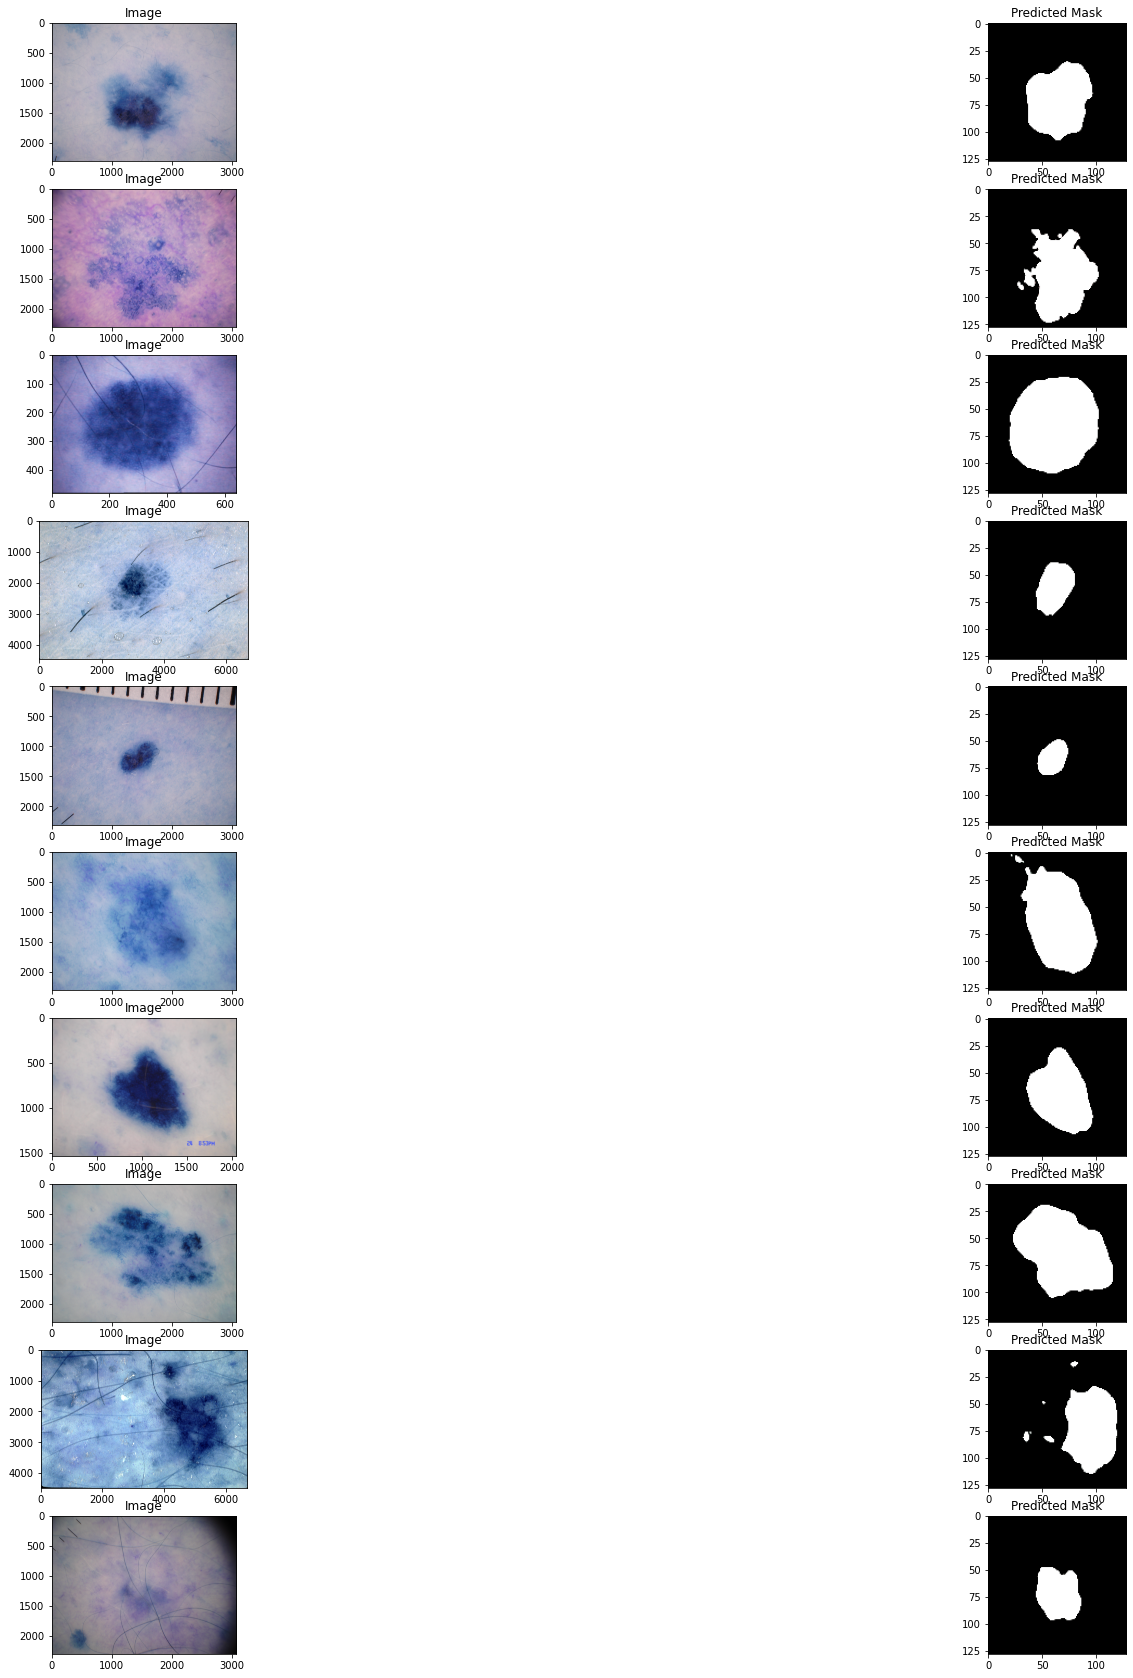

In [ ]:
grid_mask_test(500,10)

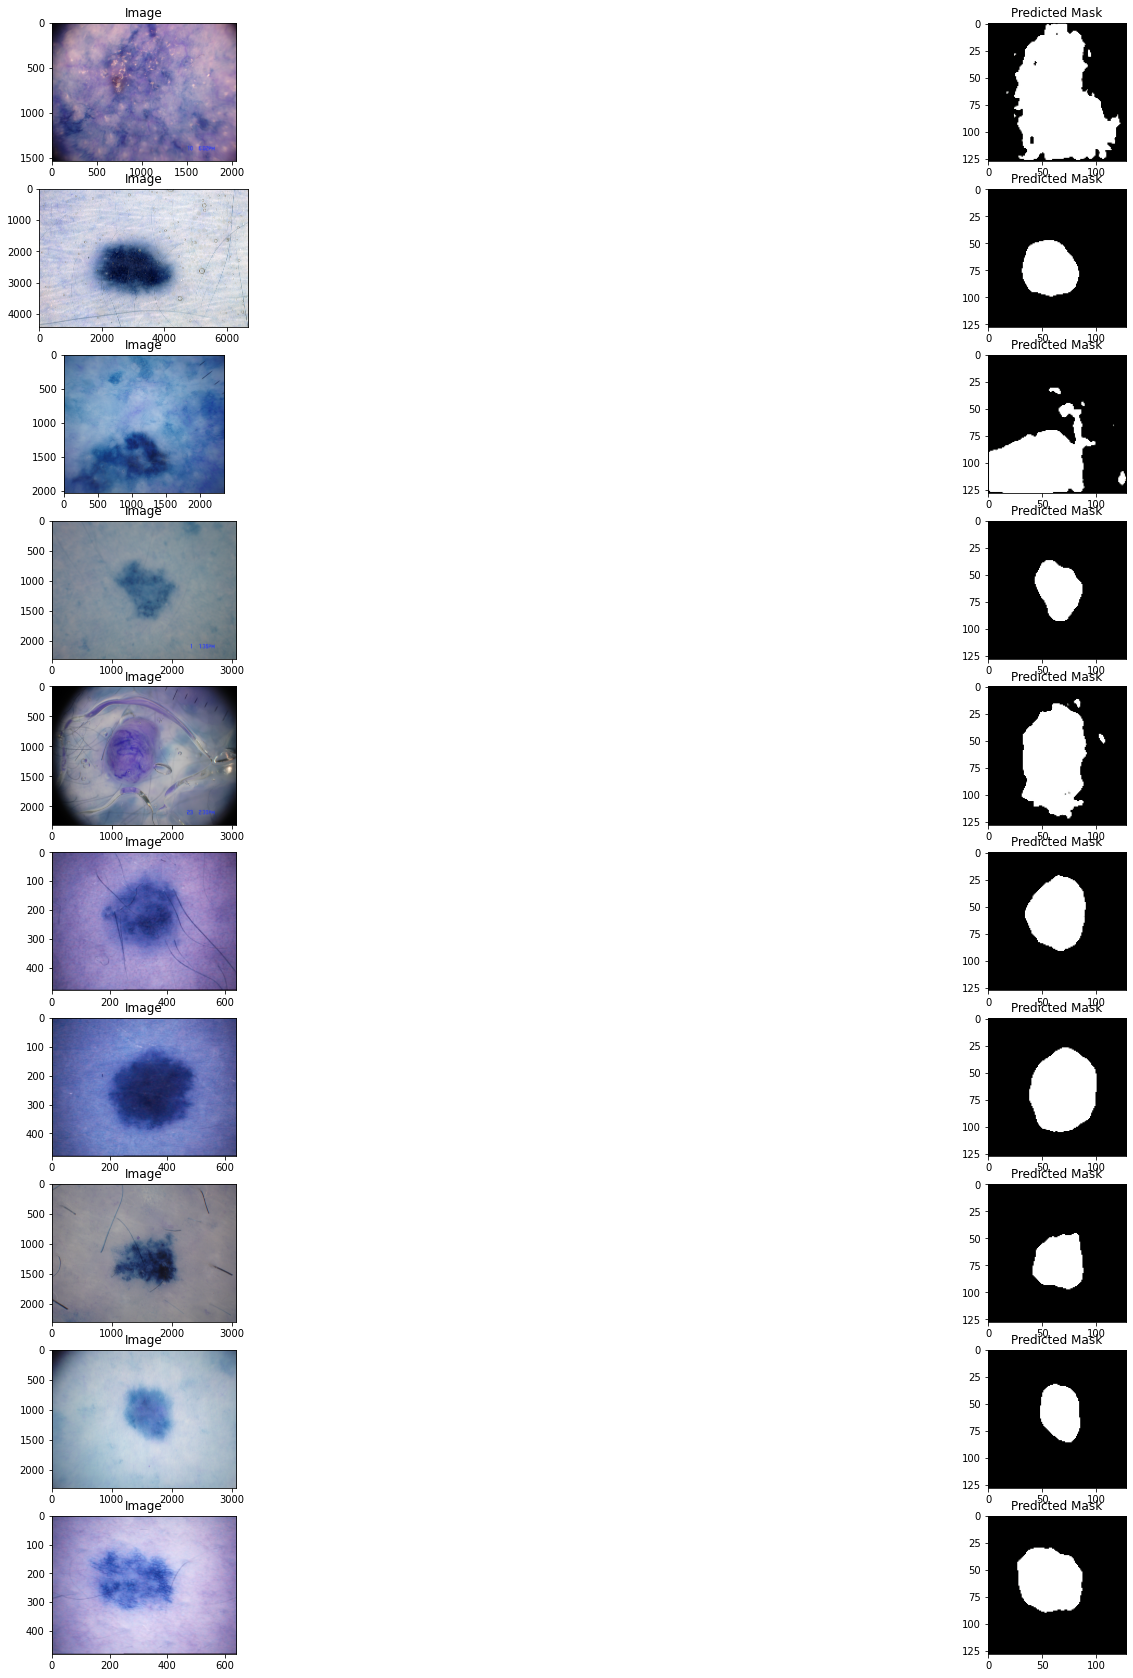

In [ ]:
grid_mask_test(727,10)

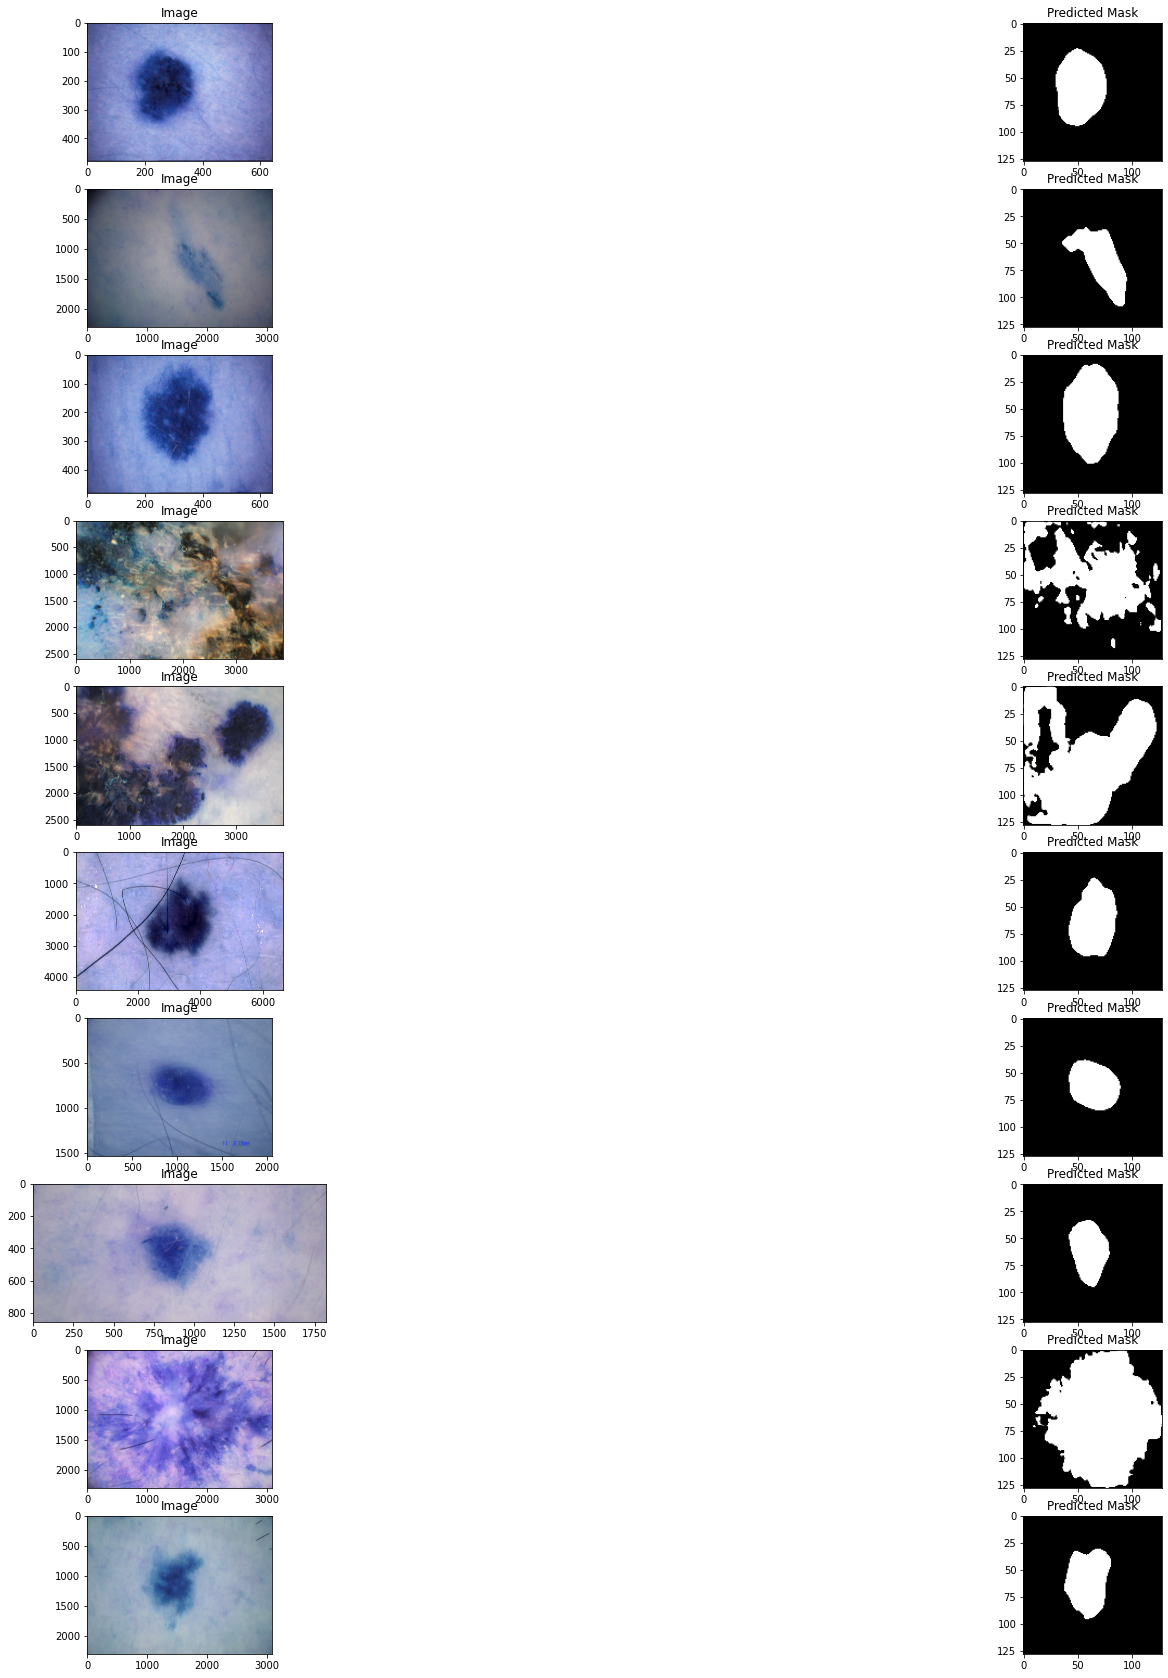

In [ ]:
grid_mask_test(990,10)

## Summary

⚪ Downloading the dataset via Kaggle API is a great quality of life.

⚪ Using *flow_from_dataframe* to create image dataset is a simple and efficient way.

⚪ Using callbacks like *ModelCheckpoint* saves you from manually saving your models.

⚪ More accurate results could be achieved by using base model (without reducing parameters of the bottleneck layer).

⚪ Data augmentation and hyperparameter tuning could be applied to achieve better prediction mask. But keep in mind that hyperparameter tuning is a laborious task and can waste your free GPU time.



